# Fetch BSPF Event Data

This notebook gets BSPF event data from the FDSN client of a local database (currently still only internal access) and stores it to a local MSEED file or an SDS filesystem

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sixdegrees.sixdegrees import sixdegrees

## Configurations

Here we set the configuration parameters

In [ ]:
config = {
    # Required time window parameters
    'tbeg': "2025-04-14 17:08:35",  # Start time
    'tend': "2025-04-14 17:09:10",  # End time
    
    # Event parameters
    'origin_time': "2025-04-14 17:08:28",
    'magnitude': 5.2,
    
    # Station coordinates (required)
    'station_lon': -116.455439,  # BSPF longitude
    'station_lat': 33.610643,    # BSPF latitude
    
    # SEED identifiers
    'seed': "XX.BSPF..",     # Default seed ID
    'rot_seed': ["PY.BSPF..HJZ", "PY.BSPF..HJN", "PY.BSPF..HJE"],  # Rotation sensor seed ID
    'tra_seed': ["PY.PFOIX..HHZ", "PY.PFOIX..HHN", "PY.PFOIX..HHE"],  # Translation sensor seed ID
    
    # Data source ('fdsn' or 'mseed_file' (local) or 'sds' file system
    'data_source': "fdsn",

    # FDSN client for rotation and translation data
    'fdsn_client_rot': "IRIS",
    'fdsn_client_tra': "IRIS",

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "BSPF_Data",  # Project name
    
    # Rotate to ZNE
    'rotate_zne': True,

    # Remove sensitivity from data
    'rot_remove_response': True,
    'tra_remove_response': True,

    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [4]:
sd = sixdegrees(conf=config)

This will load the data from the data source:
- local mseed file
- local sds system
- fdsn (online)

and trim it to the time window

In [5]:
sd.load_data(config['tbeg'], config['tend'])

-> fetching PY.PFOIX..HHZ data from FDSN
-> fetching PY.PFOIX..HHN data from FDSN
-> fetching PY.PFOIX..HHE data from FDSN
-> translation inventory requested: Inventory created at 2026-01-29T13:42:06.954200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2025-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			PY
		Stations (1):
			PY.PFOIX (Pinyon Flats Observatory, IXBlue, CA, USA)
		Channels (27):
			PY.PFOIX..ACE, PY.PFOIX..BHZ, PY.PFOIX..BHN, PY.PFOIX..BHE, 
			PY.PFOIX..HHZ, PY.PFOIX..HHN, PY.PFOIX..HHE, PY.PFOIX..LCE, 
			PY.PFOIX..LCQ, PY.PFOIX..LHZ, PY.PFOIX..LHN, PY.PFOIX..LHE, 
			PY.PFOIX..LOG, PY.PFOIX..OCF, PY.PFOIX..VCO, PY.PFOIX..VEA, 
			PY.PFOIX..VEC, PY.PFOIX..VEP, PY.PFOIX..VKI, PY.PFOIX..VM0, 
			PY.PFOIX..VM1, PY.PFOIX..VM2, PY.PFOIX..VM3, PY.PFOIX..VM4, 
			PY.PFOIX..VM5, PY.PFOIX..VM6, PY.PFOIX..VPB
-> removing response: ACC
-> rotating translational data Z

Ensure that all traces of stream have the same sample size

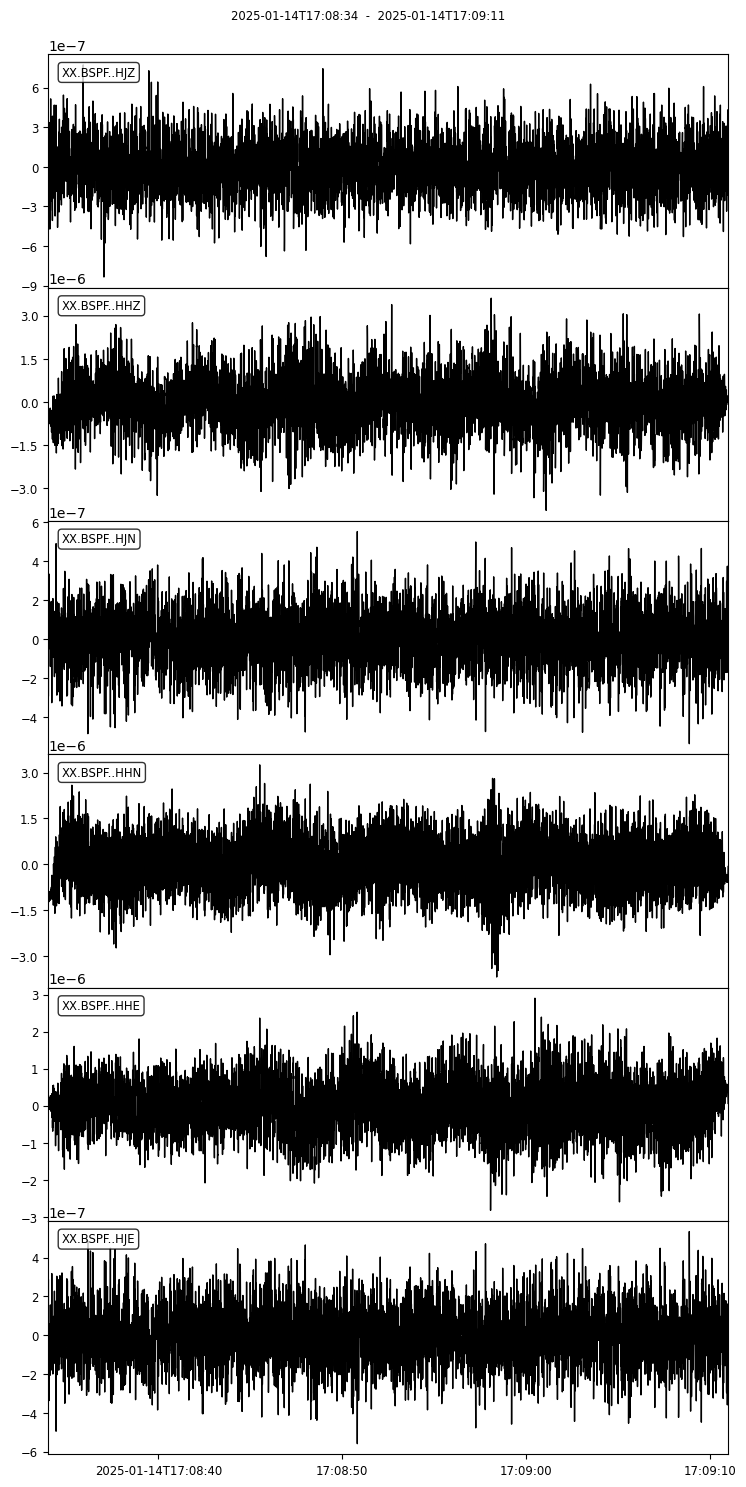

In [7]:
sd.st.plot(equal_scale=False);

In [ ]:
# ensure common number of samples across all streams
sd.trim_stream(set_common=True, set_interpolate=False)

### Write data to file or SDS system

Here the configurations are stored into a yaml file in the **config/** directory

In [ ]:
sd.store_as_yaml(config, f"./config/config_{config['project']}.yml")

The data is written to the **data/** directory

In [ ]:
# write to mseed file
sd.st.write(f"./data/{config['project']}.mseed", format="MSEED")

# write to sds filesystem
# sd.write_to_sds(sd.st, "./data/", format="MSEED")